# Relax twist structures with MLFF in Atomic Simulation Environment (ASE)

### 1. Installing ASE & NequIP

[ASE](https://wiki.fysik.dtu.dk/ase/) is a set of tools and Python modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. If you have installed DPmoire, the ase package should have been installed as requisite. 

[NequIP](https://github.com/mir-group/nequip) is an open-source code for building E(3)-equivariant interatomic potentials. The allegro-type MLFF can also run with NequIP package. 

In [ ]:
pip install ase
pip install nequip

### 1. Read structures

ASE provided various modules to read/write structures in different format. For structures in cif or other format, refer to [ase.io](https://wiki.fysik.dtu.dk/ase/ase/io/io.html#module-ase.io).

In [2]:
from ase.io.vasp import read_vasp, write_vasp

structure = read_vasp("7.34_rigid.vasp")

### 2. Setting calculator

Set the nequip MLFF calculator.

In [3]:
from nequip.ase.nequip_calculator import NequIPCalculator
import torch

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

calc = NequIPCalculator.from_deployed_model(f"./MoS2_AA.pth", device=device)
structure.calc = calc

[W init.cpp:855] Warning: Use _jit_set_fusion_strategy, bailout depth is deprecated. Setting to (STATIC, 2) (function operator())
/home/jxliu/anaconda3/envs/nequIP/lib/python3.10/site-packages/nequip/utils/_global_options.py:69: UserWarning: Setting the GLOBAL value for jit bailout depth to `2` which is different than the previous value of `12`
  warnings.warn(
/home/jxliu/anaconda3/envs/nequIP/lib/python3.10/site-packages/nequip/ase/nequip_calculator.py:73: UserWarning: Trying to use chemical symbols as NequIP type names; this may not be correct for your model! To avoid this warning, please provide `species_to_type_name` explicitly.
  warnings.warn(


### 3. Relax structure with the chosen optimizer

Here we chose FIRE optimizer to relax the rigid structure. If you want to use a different optimizer, refer to 

In [4]:
from ase.optimize import FIRE
qn = FIRE(atoms=structure, trajectory="./MoS2.traj")
qn.run(fmax=0.005)
write_vasp("./7.34_mlff_relaxed.vasp", structure)

      Step     Time          Energy          fmax
FIRE:    0 17:33:14    -2730.267334        0.173779
FIRE:    1 17:33:14    -2730.314941        0.147208
FIRE:    2 17:33:20    -2730.375732        0.099084
FIRE:    3 17:33:24    -2730.414795        0.038361
FIRE:    4 17:33:24    -2730.412109        0.088253
FIRE:    5 17:33:24    -2730.415283        0.085425
FIRE:    6 17:33:25    -2730.417969        0.079903
FIRE:    7 17:33:25    -2730.427002        0.072026
FIRE:    8 17:33:26    -2730.431641        0.062251
FIRE:    9 17:33:26    -2730.438232        0.051249
FIRE:   10 17:33:27    -2730.445312        0.039839
FIRE:   11 17:33:27    -2730.453613        0.034713
FIRE:   12 17:33:27    -2730.459717        0.042840
FIRE:   13 17:33:28    -2730.466797        0.051987
FIRE:   14 17:33:28    -2730.477295        0.058319
FIRE:   15 17:33:29    -2730.492432        0.060211
FIRE:   16 17:33:29    -2730.508545        0.056256
FIRE:   17 17:33:29    -2730.533936        0.046024
FIRE:   18 17:

6.6 6.3


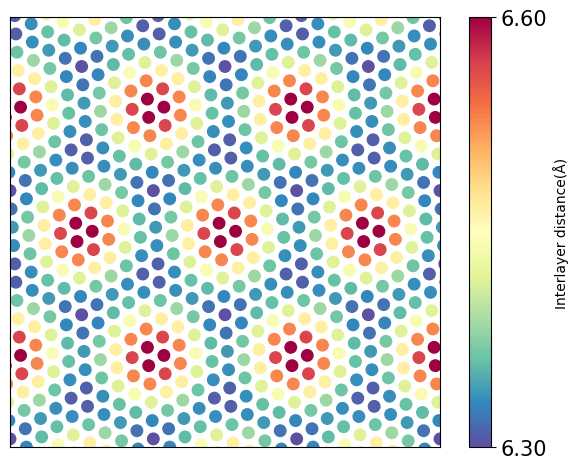

In [5]:
from DPmoire.utils.graph_plot import plot_disp_in_plane, plot_distance_z
from matplotlib import pyplot as plt
ax = plot_distance_z(structure, 6, "Mo", vrange=(6.30, 6.60))
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

0.02301585483596397 0


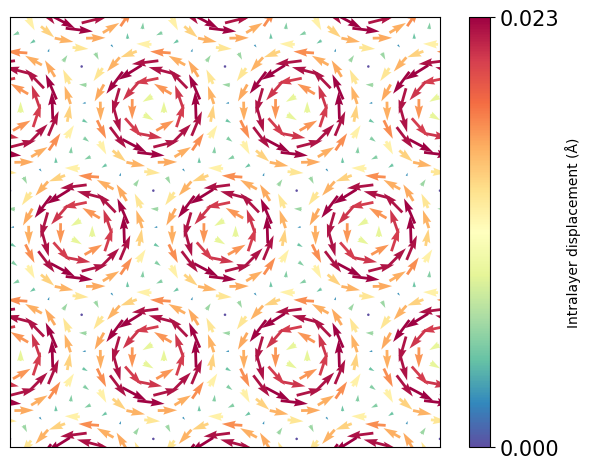

: 

In [ ]:
rigid_structure = read_vasp("7.34_rigid.vasp")
ax = plot_disp_in_plane(rigid_structure, structure, 6, "Mo", )
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()